In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
lda_matrix = pd.read_csv('lda_matrix.csv')
lda_matrix.set_index('title', inplace=True)
lda_matrix.head()

,veggie_seafood,soup,italian,asian,bread_cookie
title,,,,,
1 Pea Salad Most Requested,0.924249,0.026679,0.019934,0.015853,0.013285
10 Minute Tomato Basil Salad,0.948437,0.017808,0.013628,0.010946,0.000000
5 Cup Salad,0.034310,0.282062,0.017625,0.014268,0.651734
5 Minute Microwave Cornbread,0.041864,0.019712,0.014704,0.011895,0.911825
7 Layer Salad,0.269594,0.412651,0.222569,0.000000,0.087669


# Content-based Recommender 
## Cosine Similarity

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
lda_array = lda_matrix.to_numpy()

In [5]:
lda_array

array([[0.92424917, 0.02667881, 0.01993443, 0.01585265, 0.01328492],
       [0.94843704, 0.01780761, 0.01362788, 0.01094616, 0.        ],
       [0.03431042, 0.28206185, 0.01762547, 0.0142685 , 0.65173376],
       ...,
       [0.65090382, 0.0184241 , 0.31054133, 0.01094916, 0.        ],
       [0.96003896, 0.0141366 , 0.01041716, 0.        , 0.        ],
       [0.03192278, 0.93667972, 0.01268041, 0.01018789, 0.        ]])

In [6]:
lda_array.shape

(3954, 5)

In [7]:
cosine_sim = cosine_similarity(lda_array)

In [8]:
cosine_sim.shape

(3954, 3954)

In [9]:
# creating a Series for recipe titles
indices = pd.Series(lda_matrix.index)

In [10]:
# define a function to take in recipe title and return the top 10 recommended recipes
def recommender(title, df=lda_matrix, cosine_sim=cosine_sim, top_n=10):
    
    # initialize an empty list of recommended recipes
    rec_recipes = []
    
    # get the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)

    # getting the indexes of the n most similar movies
    top_n_idx = score_series.iloc[1:top_n+1].index.tolist()
    
    # get the title of the top n matching recipes
    for i in top_n_idx:
        rec_recipes.append(df.index[i])
        
    return rec_recipes

In [128]:
options = ['A Scotsmans Shepherd Pie']
total_rec_recipes = []
for title in options:
    rec_recipes = recommender(title, top_n=100)
    total_rec_recipes.extend(rec_recipes)

In [123]:
len(total_rec_recipes)

100

# Validation 
## Mean Similarity

In [337]:
def mean_similarity(title_list, df=lda_matrix):
    """
    Calculate mean cosine similarity of two or more recipes
    """
    array = lda_matrix.loc[title_list,:].to_numpy()
    cosine_sim = cosine_similarity(array)
    n_recipe = len(title_list)
    if n_recipe == 2:
        sim_score = np.round(cosine_sim[0, 1], 2)
    elif n_recipe > 2:
        sim_score = np.round(cosine_sim[0, 1:n_recipe].mean(), 2)
    else:
        print('Please choose at least two recipes to compare.')
    
    return sim_score

In [341]:
mean_similarity(total_rec_recipes)

0.98

# Optimizaiton

In [113]:
df = pd.read_csv('recipe_clean.csv')
df.head()

,link,title,ratings,num_reviews,ingredients,servings,cook_time,calorie,fat_g,carb_g,protein_g,cholesterol_mg,sodium_mg
0,https://www.allrecipes.com/recipe/100195/baked...,Baked Haddock,4.59,731,"['3/4 cup milk', '2 teaspoons salt', '3/4 cup ...",4.0,25,325.0,15.7,17.0,27.7,103.0,1565.0
1,https://www.allrecipes.com/recipe/100606/beef-...,Beef Bulgogi,4.79,664,"['1 pound flank steak, thinly sliced', '5 tabl...",4.0,75,232.0,13.2,12.4,16.2,27.0,1157.0
2,https://www.allrecipes.com/recipe/102159/apric...,Apricot Brown Sugar Ham,4.72,210,"['1 (10 pound) fully-cooked spiral cut ham', '...",15.0,120,801.0,56.2,14.4,56.1,170.0,3895.0
3,https://www.allrecipes.com/recipe/103503/taco-...,Taco Stuffed Shells,4.55,111,"['16 jumbo pasta shells', '1 pound ground beef...",8.0,80,361.0,17.6,30.4,19.8,60.0,957.0
4,https://www.allrecipes.com/recipe/103535/black...,Blackened Tuna Steaks With Mango Salsa,4.85,238,"['2 tablespoons olive oil', '2 tablespoons lim...",4.0,235,458.0,24.7,18.3,42.1,77.0,1233.0


In [114]:
df_nutrient = df[['title','cook_time','servings','ratings','calorie','fat_g','protein_g','carb_g','link']]
df_nutrient.set_index('title', inplace=True)
df_nutrient.head()

,cook_time,servings,ratings,calorie,fat_g,protein_g,carb_g,link
title,,,,,,,,
Baked Haddock,25,4.0,4.59,325.0,15.7,27.7,17.0,https://www.allrecipes.com/recipe/100195/baked...
Beef Bulgogi,75,4.0,4.79,232.0,13.2,16.2,12.4,https://www.allrecipes.com/recipe/100606/beef-...
Apricot Brown Sugar Ham,120,15.0,4.72,801.0,56.2,56.1,14.4,https://www.allrecipes.com/recipe/102159/apric...
Taco Stuffed Shells,80,8.0,4.55,361.0,17.6,19.8,30.4,https://www.allrecipes.com/recipe/103503/taco-...
Blackened Tuna Steaks With Mango Salsa,235,4.0,4.85,458.0,24.7,42.1,18.3,https://www.allrecipes.com/recipe/103535/black...


In [115]:
df_nutrient['fat_ratio'] = np.round(df_nutrient.fat_g * 9 / df_nutrient.calorie, 2)
df_nutrient['protein_ratio'] = np.round(df_nutrient.protein_g * 4 / df_nutrient.calorie, 2)
df_nutrient['carb_ratio'] = 1 - df_nutrient['fat_ratio'] - df_nutrient['protein_ratio']
df_nutrient.head()

/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fivecentsly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,cook_time,servings,ratings,calorie,fat_g,protein_g,carb_g,link,fat_ratio,protein_ratio,carb_ratio
title,,,,,,,,,,,
Baked Haddock,25,4.0,4.59,325.0,15.7,27.7,17.0,https://www.allrecipes.com/recipe/100195/baked...,0.43,0.34,0.23
Beef Bulgogi,75,4.0,4.79,232.0,13.2,16.2,12.4,https://www.allrecipes.com/recipe/100606/beef-...,0.51,0.28,0.21
Apricot Brown Sugar Ham,120,15.0,4.72,801.0,56.2,56.1,14.4,https://www.allrecipes.com/recipe/102159/apric...,0.63,0.28,0.09
Taco Stuffed Shells,80,8.0,4.55,361.0,17.6,19.8,30.4,https://www.allrecipes.com/recipe/103503/taco-...,0.44,0.22,0.34
Blackened Tuna Steaks With Mango Salsa,235,4.0,4.85,458.0,24.7,42.1,18.3,https://www.allrecipes.com/recipe/103535/black...,0.49,0.37,0.14


In [116]:
df_nutrient = df_nutrient[['calorie','cook_time','servings','ratings','fat_g','protein_g','carb_g',
                           'fat_ratio','protein_ratio','carb_ratio','link']]
df_nutrient.head(1)

,calorie,cook_time,servings,ratings,fat_g,protein_g,carb_g,fat_ratio,protein_ratio,carb_ratio,link
title,,,,,,,,,,,
Baked Haddock,325.0,25,4.0,4.59,15.7,27.7,17.0,0.43,0.34,0.23,https://www.allrecipes.com/recipe/100195/baked...


In [117]:
df_nutrient.shape

(3954, 11)

In [118]:
# save df_nutrient
df_nutrient.to_csv('recipe_nutrient.csv')

In [93]:
def optimizer(rec_recipes, df, protein_lower, protein_upper, calorie, time='off'):
    protein_lower = protein_lower # set protein min
    protein_upper = protein_upper # set protein max 
    fat_limit = 0.35 # set fat_ratio limit
    calorie_limit = calorie # set calorie limit 

    # create a new rec dict
    new_rec = {'recipe': [], 'link': [], 'calorie': [], 'protein': [], 'protein ratio': [], 'fat ratio': [], 
               'carb ratio': [], 'serving': []}

    while len(rec_recipes) > 0:
        if len(new_rec['recipe']) == 5:
            df = pd.DataFrame(new_rec, index=[['Day 1','Day 2','Day 3', 'Day 4', 'Day 5']])
            print('Your 5-day dinner plan is ready.')
            for i in range(5):
                print_rec(df, i)
                plot_nutrient(df, i)
            return 

        recipe = np.random.choice(rec_recipes)
        rec_recipes.remove(recipe)      
        
        # check time
        if time == 'on':
            if df.loc[recipe].cook_time > 30 or df.loc[recipe].cook_time == 0:
                continue
            
        # check fat
        if df.loc[recipe].fat_ratio > fat_limit:
            continue
            
        # check calorie
        if df.loc[recipe].calorie > calorie_limit:
            portion = np.round(calorie_limit/df.loc[recipe].calorie, 2) 
            protein = np.round(df.loc[recipe].protein_g * portion)
            
            # check protein
            if protein < protein_lower or protein > protein_upper:
                continue
            calorie = np.round(df.loc[recipe].calorie * portion) 
            protein_ratio = df.loc[recipe].protein_ratio
            fat_ratio = df.loc[recipe].fat_ratio
            carb_ratio = df.loc[recipe].carb_ratio
            serving = np.round(portion/df.loc[recipe].servings, 1)
            link = df.loc[recipe].link
            new_rec['recipe'].append(recipe)
            new_rec['link'].append(link)
            new_rec['calorie'].append(calorie)
            new_rec['protein'].append(protein)
            new_rec['protein ratio'].append(protein_ratio)
            new_rec['fat ratio'].append(fat_ratio)
            new_rec['carb ratio'].append(carb_ratio)
            new_rec['serving'].append(serving)
        else:
            portion = np.round(calorie_limit/df.loc[recipe].calorie, 2) 
            protein = np.round(df.loc[recipe].protein_g * portion)
            
            # check protein
            if protein < protein_lower or protein > protein_upper:
                continue
            calorie = np.round(df.loc[recipe].calorie * portion) 
            protein_ratio = df.loc[recipe].protein_ratio
            fat_ratio = df.loc[recipe].fat_ratio
            carb_ratio = df.loc[recipe].carb_ratio
            serving = np.round(portion/df.loc[recipe].servings, 1)
            link = df.loc[recipe].link
            new_rec['recipe'].append(recipe)
            new_rec['link'].append(link)
            new_rec['calorie'].append(calorie)
            new_rec['protein'].append(protein)
            new_rec['protein ratio'].append(protein_ratio)
            new_rec['fat ratio'].append(fat_ratio)
            new_rec['carb ratio'].append(carb_ratio)
            new_rec['serving'].append(serving)

    print('Running out of recipes. Please start over and choose more preferred meals.')
    return

In [94]:
def print_rec(df, i):
    serving = df['serving'][i]
    recipe = df['recipe'][i]
    calorie = df['calorie'][i]
    link = df['link'][i]
    print(f'Day {i+1} : {recipe}')
    print(f'Your serving: {serving}')
    print(f'Calorie: {calorie}')
    print(link)

In [95]:
def plot_nutrient(df, i):
    labels = ['Carbohydrate', 'Protein', 'Fat']
    sizes = [df['carb ratio'][i], df['protein ratio'][i], df['fat ratio'][i]]
    colors = ['lightcoral', 'lightskyblue', 'gold']

    # plot
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
            startangle=90, counterclock=False)
    plt.axis('square')
    plt.show();

Your 5-day dinner plan is ready.
Day 1 : Easy Seafood Fettucini
Your serving: 0.2
Calorie: 496.0
https://www.allrecipes.com/recipe/21582/easy-seafood-fettucini/


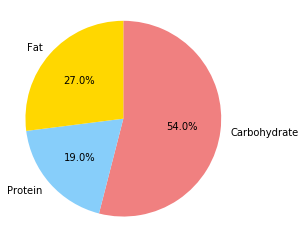

Day 2 : Savory Turkey Gravy
Your serving: 2.6
Calorie: 500.0
https://www.allrecipes.com/recipe/13527/savory-turkey-gravy/


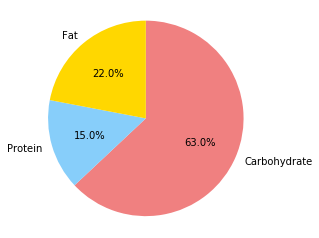

Day 3 : Simple Salmon Chowder Ii
Your serving: 0.2
Calorie: 499.0
https://www.allrecipes.com/recipe/18098/simple-salmon-chowder-ii/


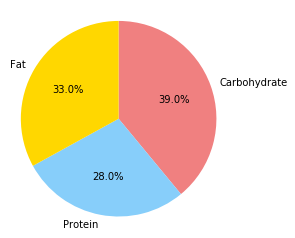

Day 4 : Quick Gnocchi
Your serving: 0.5
Calorie: 499.0
https://www.allrecipes.com/recipe/11760/quick-gnocchi/


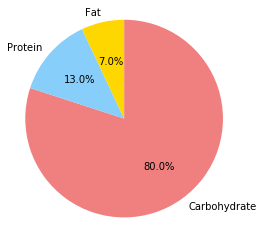

Day 5 : Beef And Noodles
Your serving: 0.3
Calorie: 498.0
https://www.allrecipes.com/recipe/236001/beef-and-noodles/


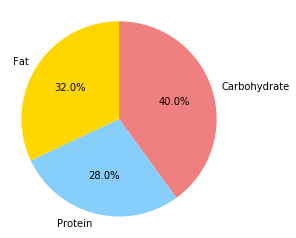

In [129]:
optimizer(total_rec_recipes, df_nutrient, 16, 44, 500)

References: 

https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://health.gov/dietaryguidelines/2015/resources/2015-2020_dietary_guidelines.pdf